In [ ]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

## Setting up variables and containers 
Running the simulation over time $1$s using a time step of $1$x$10^{-4}$s, starting at time $t_0$ = 0 with resting membrane capacitance $x_0$ = 0.
Sets a constant rate of expectation for neurones to fire in order to determine whether or not a spike occurs.
Sets up arrays in order to store values of conductance and voltage.



In [ ]:
sim_run_time = 1000
dt = 0.1
time = np.arange(0, sim_run_time, dt)

# Initial Conditions
t0 = 0 
x0 = 0 
tau = 50 # decay time constant

# Rate at which we expect spikes 
R = 0.007 # per millisecond
rate = R*dt

# Containers for capacitance and voltage
x_values = np.zeros(int(sim_run_time/dt))
v_values = np.zeros(int(sim_run_time/dt))
x_values[0] = x0

Generates a test value for each time step to determine if a spike occurse by comparios with our fixed rate. If a spike occurs, compute the change in capacitance using the relation $$\frac{dx}{dt} = -\frac{x}{\tau} + a\delta(t-t_1)$$ where the capacitance will decay without a spike. 

Cases are differentiatied using a boolean expression within the evaluation.

In [ ]:
for i in range(0, int(sim_run_time/dt)-1):
    x_values[i+1] = x_values[i] + dt*(-x_values[i]/tau + (np.random.rand())*int(bool(rate > np.random.rand())))

Every value for the conductance during our simulation time has been stored in an array. We can use these values to evaluate the voltage at any given time without the need of using and sort of ODE approximation. We can write the time-dependant synaptic conductance in the form $$g_s(t)(E_s - V) = I$$ which we can use to solve the voltage equation $$C\frac{dV}{dt} = g_L(E_L - V) + I$$ by rewritting it as $$\frac{dV}{dt} = \frac{g_L(E_L - V) + g_s(t)(E_s - V)}{C}$$ and use this to evaluate the volatage at each time step.

The value of the parameter $E_s$ depends on whether or not the neruon is excitory or inhibitary eauch corrisponding to values of 0mV and -80mV respectively. Sufficies to just use 0mV for now.


In [ ]:
g_l = 0.1 # leaky conductance
e_l = -60 # leaky reversal
e_s = 0 # reversal potential
c =  10 # capacitance
v_values[0] = -60
for i in range(0, int(sim_run_time/dt) - 1):
    v_values[i+1] = v_values[i] + dt/c*(g_l*(e_l-v_values[i])+x_values[i]*(e_s - v_values[i]))

Now attempting to visualise the accuracy of the Euler approximation. The theoretical result for the voltage equation is given by $$ V = E_L + \frac{\bar{g_s}}{g_L}(E_s - E_L)\frac{\tau_s}{\tau_L - \tau_s}(e^{-\frac{t}{\tau_L}} - e^{-\frac{t}{\tau_s}})$$ where $\bar{g_s}$ denotes the mean value of the synaptic conductance.

Calculate the value of the function for one pulse and then compare the values to that of our approximation.


In [ ]:
v_actual = np.zeros(int(sim_run_time/dt))
v_actual[0] = -60
t_s = 3
t_l = 20
mean = 0
for j in x_values:
    mean += x_values[i]/10000
for i in range (0, len(x_values) - 1):
    v_actual[i+1] = (math.exp(-i/t_l) - math.exp(-i/t_s))

Plots of results including a comparison between the approximated result and the theoretical result.

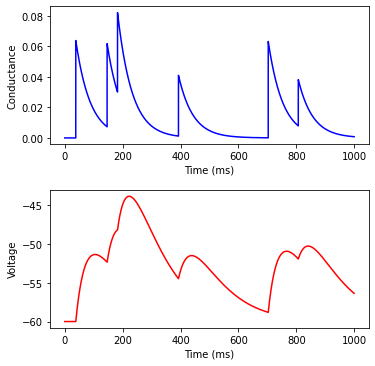

In [ ]:
figure = plt.figure(figsize = (10,5))
plt.subplot(221)
plt.tight_layout()
plt.plot(time, x_values, color = 'blue', label = 'Condunctance')
plt.ylabel('Conductance')
plt.xlabel('Time (ms)')
plt.subplot(223)
plt.tight_layout()
plt.plot(time, v_values, color = 'red', label = 'Voltage (mV)')
plt.ylabel('Voltage')
plt.xlabel('Time (ms)')
plt.show()